In [1]:
import numpy as np
import pickle
import stages
import matplotlib.pyplot as plt

In [2]:
import stages_mcsolve_config as config

states_infty_list = []
for sim in config.sim_list:
    f = open(f"data/mcsolve-lambda={sim.lmbd}-Nt={sim.Nt}-T={sim.T}-dt={sim.dt}-omega0={sim.omegaS}.pkl", "rb")
    data = pickle.load(f)
    states_infty_list.append(data[1].runs_final_states)
    f.close()

/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:42: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)
/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:42: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)


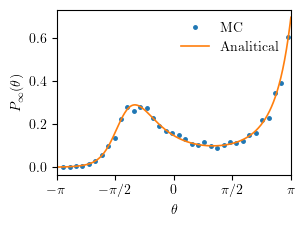

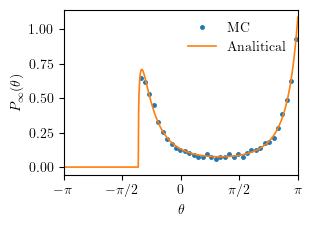

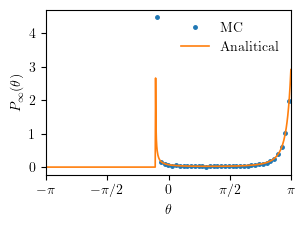

In [3]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

for sim, states_infty in zip(config.sim_list, states_infty_list):
    plt.figure()

    thetas = []
    for state in states_infty:
        thetas.append(stages.state_to_theta(state))

    counts, bins = np.histogram(thetas, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / sim.Nt / bin_width

    plt.plot(bins[:-1] + bin_width/2, freqs, ".", label=r"MC")
    plt.plot(np.arange(-np.pi, np.pi, .01), stages.p_infty(sim.lmbd, np.arange(-np.pi, np.pi, .01)), label=r"Analitical")

    plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    plt.xticks(xticks, xlabels)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$P_\infty(\theta)$")
    plt.legend()

    plt.tight_layout()

    # plt.savefig(f"plots/mcsolve-lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}-omega0={sim.omegaS}.pdf")

In [6]:
def omega_potential(lmbd, thetas):
    op = thetas - lmbd * np.cos(thetas)

    return op


def omega(lmbd, thetas):
    o = -2 * (1 + lmbd*np.sin(thetas))

    return o

/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:42: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)
/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:42: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)
/tmp/ipykernel_54911/3721262435.py:67: RuntimeWarning: invalid value encountered in sqrt
  th_plus = 2 * np.atan(-sim.lmbd + np.sqrt(sim.lmbd**2 - 1))
/tmp/ipykernel_54911/3721262435.py:77: RuntimeWarning: invalid value encountered in sqrt
  th_minu = 2 * np.atan(-sim.lmbd - np.sqrt(sim.lmbd**2 - 1))


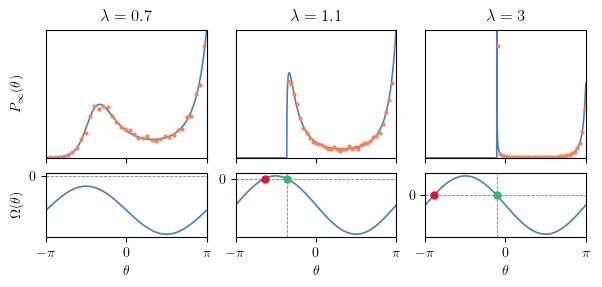

In [39]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_2x3.mplstyle"])


fig, axs = plt.subplots(2, 3,
                        height_ratios=[2, 1],
                        sharex=True,
                        # sharey=True,
                        layout='constrained')

fig.set_figwidth(15/2.54)
fig.set_figheight(7/2.54)

for i, (sim, states_infty) in enumerate(zip(config.sim_list, states_infty_list)):
    thetas = []
    for state in states_infty:
        thetas.append(stages.state_to_theta(state))

    counts, bins = np.histogram(thetas, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / sim.Nt / bin_width

    max_freq = np.max(freqs)
    ylim = [0, 1.15*max_freq]

    axs[0, i].plot(np.linspace(-np.pi, np.pi, 10**5),
                stages.p_infty(sim.lmbd, np.linspace(-np.pi, np.pi, 10**5)),
                lw=1.2,
                color='steelblue',
                label=r'Analytical')
    axs[0, i].plot(bins[:-1] + bin_width/2,
                freqs,
                ".", ms=4,
                color="coral",
                label=r'Monte Carlo')

    axs[0, i].set_xlim((-np.pi, np.pi))
    axs[0, i].set_ylim(ylim)
    xticks = [-np.pi, 0, np.pi]
    xlabels = [r"$-\pi$", r"$0$", r"$\pi$"]
    axs[0, i].set_xticks(xticks, xlabels)
    axs[0, i].set_xlabel(r"$\theta$")
    axs[0, i].set_ylabel(r"$P_\infty(\theta)$")
    # if i == 0:
    #     axs[i].set_ylabel(r"$P_\infty(\theta)$")
    axs[0, i].set_yticks([])
    axs[0, i].set_title(rf"$\lambda = {sim.lmbd}$")


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1.04, 1), borderaxespad=0)


for i, (sim, states_infty) in enumerate(zip(config.sim_list, states_infty_list)):

    axs[1, i].plot(np.linspace(-np.pi, np.pi, 10**5),
                   omega(sim.lmbd, np.linspace(-np.pi, np.pi, 10**5)),
                #    lw=1.2,s
                   color='steelblue')
    axs[1, i].set_yticks([0])

    axs[1, i].set_xlabel(r"$\theta$")
    axs[1, i].set_ylabel(r"$\Omega(\theta)$")

    axs[1, i].axhline(y=0, color='gray', linestyle='--', lw=.6, zorder=-1)

    if sim.lmbd > 0:
        th_plus = 2 * np.atan(-sim.lmbd + np.sqrt(sim.lmbd**2 - 1))
        axs[1, i].plot(th_plus, 0,
                       "o",
                       markersize=5,
                       color='mediumseagreen',
                       label=r'Stable')
        
        axs[1, i].axvline(x=th_plus, color='gray', linestyle='--', lw=.6, zorder=-1)
        # axs[0, i].axvline(x=th_plus, color='gray', linestyle='--', lw=.6)

        th_minu = 2 * np.atan(-sim.lmbd - np.sqrt(sim.lmbd**2 - 1))
        axs[1, i].plot(th_minu, 0,
                       "o",
                       markersize=5,
                       color='crimson',
                       label=r'Unstable')


# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# by_label = dict(zip(labels, lines))
# fig.legend(by_label.values(), by_label.keys(),
#            bbox_to_anchor=(1.04, 1), borderaxespad=0)

# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, labels, bbox_to_anchor=(1.04, 1), borderaxespad=0)
# fig.legend(handles, labels)
# fig.legend()

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.yaxis.set_tick_params(labelleft=True)

fig.align_ylabels(axs[:, 0])

# plt.tight_layout()
# plt.savefig(f"plots/single/single-p_infty.pdf")

In [13]:
data[1].runs_final_states

[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.98770927+0.j        ]
  [ 0.        +0.15630228j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.00880057+0.j        ]
  [ 0.        -0.99996127j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.9855986+0.j        ]
  [ 0.       +0.16910177j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.99859689+0.j        ]
  [ 0.        +0.05295523j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.42899681+0.j        ]
  [0.        +0.90330601j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.98559854+0.j        ]
  [ 0.        +0.16910209j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.40682251+0.j        ]
  [ 0.        -0.91350722j]],
 Qu